<h1><center>Capstone Project - The Battle of Neighborhoods</center></h1>


<h2><center>Compare and Analyze Data of Two Cities: Raleigh, NC and Atlanta, GA</center></h2>
<h2><center>House Sale & Rent Prices and Venues Data Analysis of the Optimal City</center></h2>

___


## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction  <a name="introduction"></a>

**1. Background** 
<br>
Many middle-class people plan to move out New York City due to **high tax**, **high houses' sale price**, **high houses' rental price**, **poor housing**, **the crowed city**, **education quality declining**, and **poor security**. The stakeholders would like to find a place with a good sense of community, a safe and friendly neighborhood, and less crowded and quiet area. 

**2. Problem**
<br>
How can we tell which city will be an optimal city to move to based on these criteria? Which location of the optimal city will be the better place to live in? What popular venues are around this location? What are the houses' sale prices or rental prices around this location? 

**3. Interest**
<br>
In this project, it will compare, and analyze the data of two cities: **Atlanta, Georgia** and **Raleigh, North Carolina** that a stakeholder interested in moving to based on the optimal criteria. So, people who would like to move to one of these two cities will be interested.


---

## Data <a name="data"></a>

Based on definition of the problem, the data will be needed:
* From the AreaVibes websites what locals think about their city, rating of different categories, and top-rated schools
* From the Census website for population data
* From the Zillow website for houses' sales & rentals
* From FourSquare for the popular venues, ratings, and tips

Steps need to take to solve the problem:
1. Web scrape the data about Atlanta, Georgia and Raleigh, North Carolina from **AreaVibes** and **United States Census** using **Request** and **BeautifulSoup** 
2. Clean, compare, and analyze the data to find out which city is optimal to move to using **Pandas** and **Matplotlib** for visualization, comparison, and analysis
3. Get the top-rated schools' data of the optimal city from **AreaVibes** and find the optimal centroid spots around these schools using **Geopy.geocoders**
4. Explore popular spots of each optimal centroid using **Request** and **FourSquare API**
5. Find houses' sale & rental data around each optimal area by web scraping data from **Zillow** using **Request** and **BeautifulSoup**
6. Mark these spots/places on a map using **Folium**
7. Search a specific venue and find rating and tips about the specific venue using **Request** and **FourSquare API**


---

## Methodology <a name="methodology"></a>

* [Step 1:](#step1) Compare and analyze the data from two sources: **Areavibes and United States Census** using web scraping with **Request** and **Beautiful Soup** between two cities: **Atlanta, GA and Raleigh, NC** to find the optimal city
* [Step 2:](#step2) Find the centroid locations based on the data of the optimal city using **Geopy.geocoders** and then compare and analyze data based on these locations' zip code  to find out the optimal centroid locations to live in, last add these locations to the map using **Folium**
* [Step 3:](#step3) Explore popular spots of each optimal centroid using **FourSquare API** and mark these spots to the map using **Folium**
* [Step 4:](#step4) Find data of "houses for sale" and "houses for rent" around these optimal centroids' zip code from **Zillow** using web scraping with **Request** and **Beautiful Soup**
* [Step 5:](#step5) Search a specific venue using **Request** and **FourSquare API** and add to the map
* [Step 6:](#step6) Find the rating and tips about the specific venue using **Request** and **FourSquare API**


### 1. Compare and Analyze Data <a name="step1"></a>

##### <font color='red'>*** Import required libraries for web scraping and creating dataframes</font>

In [1]:
import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup # library for web scraping
import requests # library to handle requests
import re # library for regular expression operations

print('Libraries are imported!')

Libraries are imported!


#### <font color='blue'>1.1 Scraping data from the AreaVibe website</font> 

In [2]:
areavibes = 'https://www.areavibes.com/'
ga_city = 'atlanta-ga/'
nc_city = 'raleigh-nc/'

def request_soup(url):
    request = requests.get(url) 
    bsobj = BeautifulSoup(request.content, 'html.parser')

    return bsobj

# create soups for scraping data
ga_soup = request_soup(areavibes+ga_city)
nc_soup = request_soup(areavibes+nc_city)

# ga_soup   # this line was commented out to avoid displaying the lengthy source, please see the data below

In [3]:
# A function creates a dataframe "What Do The Locals Think About Atlanta?" and a number of votes
def local_think(soup):
    local_list = []
    local_think = soup.find('div',{'class':'locals-think'})
    for data in local_think.findAll('a'):
        local_list.append(data.text.replace('%', "|").strip().split('|'))
    local_df = pd.DataFrame(local_list, columns=['Percent', 'Categories'])
    
    # get number of votes from AreaVibes users
    info = soup.find('body')
    for votes in info.findAll('span', {'class':'read-more'}):
        vote = votes.text.strip()
        if re.search('votes', vote, re.IGNORECASE):
            count = int(re.findall(r'(\d+) votes', vote)[0])
            
    return local_df, count

# a function return the address of the school
def school_addr(link):
    soup = request_soup(link)
    data = soup.find('span', {'class':'school-head-title'})
    addr = data.text.strip().split('|')[0]
    return addr

# A function creates a dataframe of Top Rated schools in the city
def top_school_rating(soup):
    schools_list = []
    address = []
    school = soup.find('table',{'class':'av-default guide-schools'})
    
    # scraping each school's address
    for href in school.findAll('a'):
        link = re.findall('"/.*/"', str(href))
        url_link = link[0].replace('"', '')
        addr = school_addr(areavibes+url_link)
        address.append(addr)
    
    # scraping top rated schools' info
    for data in school.findAll('tr'):
        sch_data = []
        for td_data in data.findAll('td'):
            sch_data.append(td_data.text.strip())
        schools_list.append(sch_data)
    
    # a dataframe of the top rated school
    school_df = pd.DataFrame(schools_list[1:], columns=schools_list[0])
    school_df['Address'] = address
    
    return school_df

print('Functions are created!')

Functions are created!


In [4]:
# Create a dataframe of what Atlanta, GA Locals think
ga_lt_df, ga_votes = local_think(ga_soup)
ga_lt_df['Percent'] = ga_lt_df['Percent'].astype(float)

ga_lt_df

,Percent,Categories
0,21.0,Family friendly
1,51.0,Public transit is accessible
2,49.0,Walkable to grocery stores
3,21.0,Yards are well-kept
4,46.0,Lots of parks
5,51.0,Walkable to restaurants
6,28.0,Friendly neighbors
7,21.0,Safe at night
8,38.0,Pet friendly
9,64.0,Streets have sidewalks


In [5]:
# Create a dataframe of what Raleigh NC Locals think
nc_lt_df, nc_votes = local_think(nc_soup)
nc_lt_df['Percent'] = nc_lt_df['Percent'].astype(float)

nc_lt_df

,Percent,Categories
0,76.0,Family friendly
1,34.0,Public transit is accessible
2,28.0,Walkable to grocery stores
3,41.0,Yards are well-kept
4,69.0,Lots of parks
5,41.0,Walkable to restaurants
6,59.0,Friendly neighbors
7,62.0,Safe at night
8,55.0,Pet friendly
9,59.0,Streets have sidewalks


In [6]:
# convert percentage to number of votes
ga_lt_df['Percent'] = ga_lt_df['Percent']*ga_votes/100
nc_lt_df['Percent'] = nc_lt_df['Percent']*nc_votes/100

ga_lt_df.set_index('Categories', inplace=True)
ga_lt_df.index.name = None
ga_lt_df = ga_lt_df.rename(columns={'Percent': 'Atlanta_GA'})

# combine two dfs together
ga_nc = ga_lt_df

ga_nc['Raleigh_NC'] = nc_lt_df['Percent'].values

ga_nc

,Atlanta_GA,Raleigh_NC
Family friendly,8.19,22.04
Public transit is accessible,19.89,9.86
Walkable to grocery stores,19.11,8.12
Yards are well-kept,8.19,11.89
Lots of parks,17.94,20.01
Walkable to restaurants,19.89,11.89
Friendly neighbors,10.92,17.11
Safe at night,8.19,17.98
Pet friendly,14.82,15.95
Streets have sidewalks,24.96,17.11


#### <font color='blue'>1.2 Let's visualzie what the locals think about their city using Matplotlib</font>

##### <font color ='red'> *** Import required libraries for visualization</font>

In [7]:
# using the inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries are imported!')

Libraries are imported!


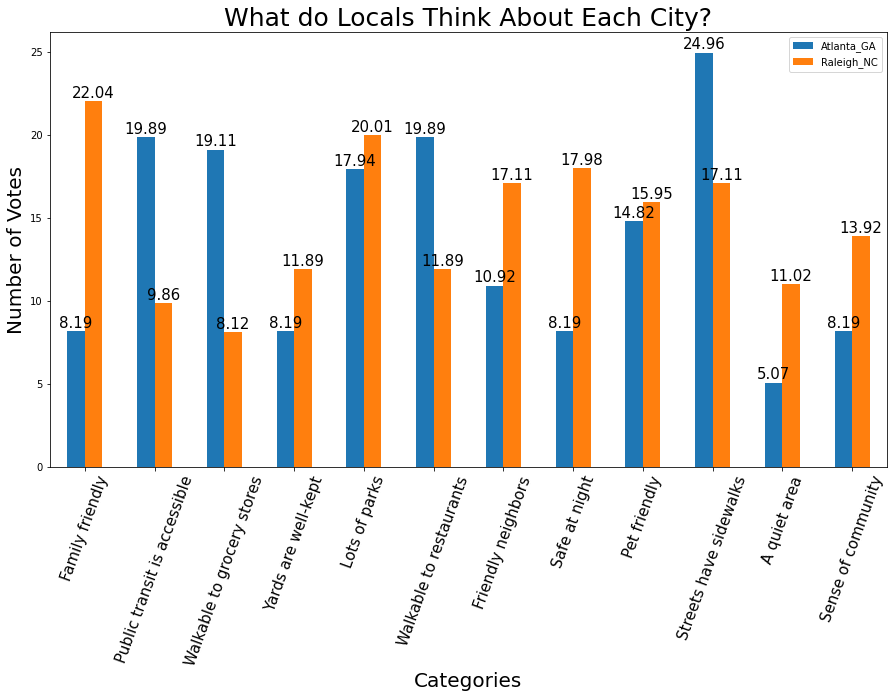

In [8]:
def single_barplot(df, ax, b_title, x_label, y_label):
    plot = df.plot.bar(ax=ax)
    for bar in plot.patches:
        plot.annotate(format(bar.get_height()),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=15, xytext=(0, 8),
                       textcoords='offset points')
    ax.set_title(b_title, size = 25)
    ax.set_ylabel(y_label, size = 20 )
    ax.set_xlabel(x_label, size = 20)
    ax.set_xticklabels(df.index, size = 15, rotation=0)
    

title = 'What do Locals Think About Each City?'
ylabel = 'Number of Votes'
xlabel = 'Categories'
fig, ax1 = plt.subplots(figsize=(15,8))
single_barplot(ga_nc, ax1, title, xlabel, ylabel)
ax1.set_xticklabels(ga_nc.index, size = 15, rotation=70)
plt.show()

> **From the bar plot above, it shows that Raleigh, North Carolina is a optimal city to move to because there are higher number of people think positive about family friendly, parks, friendly neighbors, safe at night, and sense of community than Atlanta, GA.**

**Let's look at another group of data from the AreaVibe website to compare these two cities.**

#### <font color='blue'>1.3 Scraping more data from the AreaVibe website

In [9]:
ga_liv = 'atlanta-ga/livability/'
nc_liv = 'raleigh-nc/livability/'

ga_liv_soup = request_soup(areavibes+ga_liv)
nc_liv_soup = request_soup(areavibes+nc_liv)

# ga_liv_soup  # this line was commented out to avoid displaying the lengthy source, please see the data below

In [10]:
# A function creates a dataframe of different categories' rating   
def city_rating(soup):
    rating_list = []
    rating = soup.find('nav', {'class':'category-menu-new'})
    for data in rating.findAll('a'):
        d_fact = []
        d_fact.append(data.find('em').text.strip())
        d_fact.append(data.find('i').text.strip())
        rating_list.append(d_fact)
    rating_df = pd.DataFrame(rating_list, columns=['Categories', 'Rating'])
    return rating_df

ga_rating = city_rating(ga_liv_soup)
ga_rating

,Categories,Rating
0,Livability,62
1,Amenities,A+
2,Cost of Living,D+
3,Crime,F
4,Employment,D
5,Housing,C+
6,Schools,F
7,User Ratings,D+


In [11]:
nc_rating = city_rating(nc_liv_soup)
nc_rating

,Categories,Rating
0,Livability,78
1,Amenities,A+
2,Cost of Living,D+
3,Crime,B
4,Employment,C
5,Housing,B-
6,Schools,C+
7,User Ratings,D+


#### <font color='blue'>1.4 Let's compare and analyze the new data between two cities</font>

In [12]:
ga_rating.set_index('Categories', inplace=True)
ga_rating.index.name = None
ga_rating = ga_rating.rename(columns={'Rating': 'Atlanta_GA'})

# combine two dataframes together
rating_df = ga_rating
rating_df['Raleigh_NC'] = nc_rating['Rating'].values

new_rating_df= rating_df.transpose()
new_rating_df

,Livability,Amenities,Cost of Living,Crime,Employment,Housing,Schools,User Ratings
Atlanta_GA,62,A+,D+,F,D,C+,F,D+
Raleigh_NC,78,A+,D+,B,C,B-,C+,D+


> **From the above data, Raleigh, North Carolina has better rating of Livability, Crime, Employment, Housing, and Schools than Atlanta does. Therefore, Raleigh is a better place to live than Atlanta, Georgia.**



#### <font color='blue'>1.5 Let's look at third data from the United States Census Website</font>

##### <font color='red'>Download and load population data to a dataframe</font>

In [13]:
!wget -q -O 'population.csv' https://www.census.gov/quickfacts/fact/csv/atlantacitygeorgia,raleighcitynorthcarolina/POP010220
print('Data downloaded!')

Data downloaded!


In [14]:
# Load data from csv file into a dataframe
popu_df = pd.read_csv('population.csv')
# Remove NULL columns
popu_df.drop(['Fact Note', 'Value Note for Atlanta city, Georgia', 'Value Note for Raleigh city, North Carolina'], axis=1, inplace=True)

# Clean data
popu_df = popu_df.loc[range(3,62)]

popu_df.reset_index(drop=True, inplace=True)
popu_df.head()

,Fact,"Atlanta city, Georgia","Raleigh city, North Carolina"
0,"Population, Census, April 1, 2020","498,715","467,665"
1,"Population, Census, April 1, 2010","420,003","403,892"
2,"Persons under 5 years, percent",5.4%,5.9%
3,"Persons under 18 years, percent",18.3%,20.9%
4,"Persons 65 years and over, percent",11.5%,10.6%


#### <font color='blue'>1.6 Filter and create a dataframe for population, income, and proverty</font>

In [15]:
def filter_convert_values(df, col1, col2):
    df[col1]= df[col1].str.replace('$', '', regex=True).str.replace('%', '').str.replace(',', '', regex=True).astype(float)
    df[col2]= df[col2].str.replace('$', '', regex=True).str.replace('%', '').str.replace(',', '', regex=True).astype(float)
    df.set_index('Fact', inplace=True)
    df.index.name = None
    df = df.transpose()
    return df

# create a new dataframe of total number of population of two cities with new data type
population_df = popu_df.loc[[0]]
population_df = filter_convert_values(population_df, 'Atlanta city, Georgia', 'Raleigh city, North Carolina')

# create a new dataframe of Median household income of two cities with new data type
income_df = popu_df.loc[[41]]
income_df = filter_convert_values(income_df, 'Atlanta city, Georgia', 'Raleigh city, North Carolina')

# create a new dataframe of percentage of people in poverty of two cities with new data type
poverty_df = popu_df.loc[[43]]
poverty_df = filter_convert_values(poverty_df, 'Atlanta city, Georgia', 'Raleigh city, North Carolina')


#### <font color='blue'>1.7 Let's visualize the data of population, income, and poverty using Matplotlib</font>

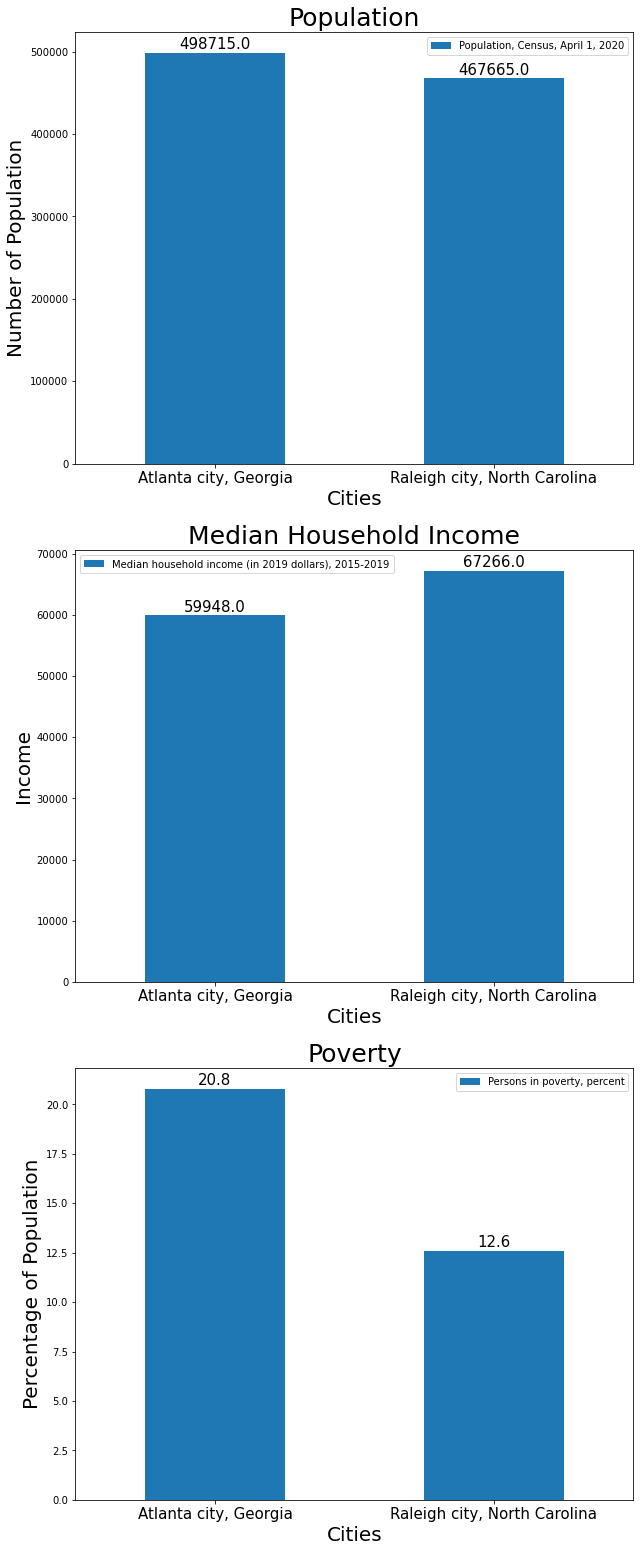

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(10, 27))
single_barplot(population_df, axes[0], 'Population', 'Cities', 'Number of Population')
single_barplot(income_df, axes[1], 'Median Household Income', 'Cities', 'Income')
single_barplot(poverty_df, axes[2], 'Poverty', 'Cities', 'Percentage of Population')

plt.show()

> **From the Census data, it also shows that Raleigh, North Carolina has less population (Less crowded), high median household income, and low poverty rate. Hence, Raleigh, North Georgia is an optimal city to move to.** 
---

### 2. Find the optimal centroid locations in Raleigh, NC<a name="step2"></a>

#### <font color='blue'>2.1 Now let's look at the top rated schools in Raleigh, North Carolina!</font>

In [17]:
# Create a top rated school dataframe
nc_school=top_school_rating(nc_soup) # scraping data from the AreaVibe website
nc_school

,Name,Grades,Students,Proficiency,Address
0,Raleigh Charter High School,9 - 12,559,94%,"1307 Glenwood Avenue, Raleigh NC, 27605"
1,Magellan Charter,3 - 8,406,92%,"9324 Baileywick Road, Raleigh NC, 27615"
2,Quest Academy,KG - 8,144,91%,"10908 Strickland Road, Raleigh NC, 27615"
3,Wake Early College Of Health And Science,9 - 13,309,80%,"2901 Holston Lane, Raleigh NC, 27610"
4,Envision Science Academy,KG - 6,252,80%,"9400 Forum Dr, Raleigh NC, 27615"
5,Wake Stem Early College High School,9 - 12,208,80%,"715 Barbour Dr, Raleigh NC, 27603"
6,Brassfield Elementary,KG - 5,780,80%,"2001 Brassfield Rd, Raleigh NC, 27614"
7,Sycamore Creek Elementary,PK - 5,"1,132",78%,"10921 Leesville Rd, Raleigh NC, 27613"


##### <font color='red'>Import required libraries!</font>

In [18]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

! pip install folium==0.5.0
import folium # plotting library

import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

print('Libraries imported.')

     |████████████████████████████████| 79 kB 9.4 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=52e1528905239ac47b147d54c536f52909da8bb4af453c9eba4186587a03302b
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ef/4c/4a/17fd3d7fb7b6243d5a7a8d165870cd5c6ad2ec4c0582f039e4
Successfully built folium
Libraries imported.


#### <font color='blue'>2.2 Get the coordinate of the center from these top-rated schools and the zip code</font>
> **K-mean clustering was not used to find the centroids due to the dataset was small. So calculating the average of coordinates was used to find the centroid.**

In [19]:
# A function return the centroid's coordinate, a group of coordinates, and a new dataframe
def centroid(df, addresses):
    lat_sum = 0
    lon_sum = 0
    center = []
    coordinates = []
    i = 0
    j = 0
    new_df = df
    for addr in addresses:
        try:
            geolocator = Nominatim(user_agent="foursquare_agent")
            location = geolocator.geocode(addr)
            latitude = location.latitude
            longitude = location.longitude
            coordinates.append([latitude, longitude])
            lat_sum += latitude
            lon_sum += longitude
            i += 1
        except:
            print("Can't locate the coordinates for: ", addr)
            new_df = df.drop([i])
            i += 1
            df = new_df
            j += 1
    new_df.reset_index(drop=True, inplace=True)
    center.append(lat_sum/(len(addresses)-j))
    center.append(lon_sum/(len(addresses)-j))
    return (center, coordinates, new_df)

# return the centroid's coordinate and top rated schools' coordinate
centroid_coor, schools_coors, schools_df = centroid(nc_school, nc_school.Address)
print(centroid_coor, schools_coors)

schools_df

Can't locate the coordinates for:  2001 Brassfield Rd, Raleigh NC, 27614 
[35.85449689907985, -78.66092245493171] [[35.7960382, -78.64724121049986], [35.91087935, -78.66159427977195], [35.90177635612701, -78.67682538724435], [35.784465, -78.584834], [35.8972178, -78.6561294], [35.77262608743194, -78.66650503047518], [35.9184755, -78.73332787653061]]


,Name,Grades,Students,Proficiency,Address
0,Raleigh Charter High School,9 - 12,559,94%,"1307 Glenwood Avenue, Raleigh NC, 27605"
1,Magellan Charter,3 - 8,406,92%,"9324 Baileywick Road, Raleigh NC, 27615"
2,Quest Academy,KG - 8,144,91%,"10908 Strickland Road, Raleigh NC, 27615"
3,Wake Early College Of Health And Science,9 - 13,309,80%,"2901 Holston Lane, Raleigh NC, 27610"
4,Envision Science Academy,KG - 6,252,80%,"9400 Forum Dr, Raleigh NC, 27615"
5,Wake Stem Early College High School,9 - 12,208,80%,"715 Barbour Dr, Raleigh NC, 27603"
6,Sycamore Creek Elementary,PK - 5,"1,132",78%,"10921 Leesville Rd, Raleigh NC, 27613"


In [20]:
# a function return the zip code of a pair coordinates
def reverse_addr_zip(coordinate):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.reverse(coordinate)
    addr = location.address
    zipcode = addr.split(',')[-2].split('-')[0].replace(' ', '')
    return zipcode

centroid_zip = reverse_addr_zip(centroid_coor)
print("The zip code of the centroid around all top rated schools is: ", centroid_zip)

The zip code of the centroid around all top rated schools is:  27612


#### <font color='blue'>2.3 Let's visualize the centroid(<font color='red'>red markers</font>) and top-rated schools(<font color='green'>green markers</font>) on a map</font>


In [21]:
# A function adds a single mark to the map
def one_mark_toMap(coordinate, r, label, mcolor, a_map):
    folium.CircleMarker(
        coordinate,
        radius=r,
        popup=label,
        fill=True,
        color=mcolor,
        fill_color=mcolor,
        fill_opacity=0.6
        ).add_to(a_map)

    
# A function adds multiple marks to the map
def mul_marks_toMap(coordinates, r, label, mcolor, a_map):
    for coordinate, plabel in zip(coordinates, label):
        folium.CircleMarker(
            coordinate,
            radius=r,
            popup=plabel,
            fill=True,
            color=mcolor,
            fill_color=mcolor,
            fill_opacity=0.6
            ).add_to(a_map)

# A function adds multiple marks to the map with the coordinates in a dataframe
def df_marks_toMap(df, r, mcolor, a_map):
    for lat, lng, label in zip(df.lat, df.lng, df.categories):
        folium.CircleMarker(
            [lat, lng],
            radius=r,
            popup=label,
            fill=True,
            color=mcolor,
            fill_color=mcolor,
            fill_opacity=0.6
            ).add_to(a_map)


nc_map = folium.Map(location=centroid_coor, zoom_start=10) # generate a map of the centroid
one_mark_toMap(centroid_coor, 15, "Centroid, Zip: 27612", 'Red', nc_map)
mul_marks_toMap(schools_coors, 10, schools_df.Name, 'green', nc_map)

# display map
nc_map

> **From the above map, the top-rated schools can be divided into two groups based on the distances and grades.**

#### <font color='blue'>2.4 Get the coordinate of the center from these top-rated K-8 schools and the zip code</font>

In [22]:
# Create a new dataframe of k-8 schools
k8_schools = schools_df.loc[[1,2,4,6], schools_df.columns]
k8_schools.reset_index(drop=True, inplace=True)
k8_schools.head()

,Name,Grades,Students,Proficiency,Address
0,Magellan Charter,3 - 8,406,92%,"9324 Baileywick Road, Raleigh NC, 27615"
1,Quest Academy,KG - 8,144,91%,"10908 Strickland Road, Raleigh NC, 27615"
2,Envision Science Academy,KG - 6,252,80%,"9400 Forum Dr, Raleigh NC, 27615"
3,Sycamore Creek Elementary,PK - 5,"1,132",78%,"10921 Leesville Rd, Raleigh NC, 27613"


In [23]:
# get the centroid's coordinates of top rated k-8 schools
centroid_k8_coor, k8_coors, k8_school_df = centroid(k8_schools, k8_schools.Address)

# get the zip code of cnetroid of K-8 schools
k8_zip = reverse_addr_zip(centroid_k8_coor)
print("The zip code of the centroid around k-8 schools is: ", k8_zip)

The zip code of the centroid around k-8 schools is:  27613


#### <font color='blue'>2.5 Get the coordinate of the center from these top-rated high schools</font>

In [24]:
high_schools = schools_df.loc[[0,3,5], schools_df.columns]
high_schools.reset_index(drop=True, inplace=True)
high_schools

,Name,Grades,Students,Proficiency,Address
0,Raleigh Charter High School,9 - 12,559,94%,"1307 Glenwood Avenue, Raleigh NC, 27605"
1,Wake Early College Of Health And Science,9 - 13,309,80%,"2901 Holston Lane, Raleigh NC, 27610"
2,Wake Stem Early College High School,9 - 12,208,80%,"715 Barbour Dr, Raleigh NC, 27603"


In [25]:
# get the centroid's coordinates of top rated high schools
centroid_high_coor, high_coors, high_school_df = centroid(high_schools, high_schools.Address)

# get the zip code of cnetroid of high schools
high_zip = reverse_addr_zip(centroid_high_coor)
print("The zip code of the centroid around high schools is: ", high_zip)

The zip code of the centroid around high schools is:  27601


#### <font color='blue'>2.6 Compare and Analyze data between these three centroids and the top-rated schools</font>

> **Let's check the livability of at these zip codes. Centroid_zip: 27612 and K8_zip: 27613 are both at Northwest, Raleigh, North Carolina. High_zip: 27601 is at Central, Raleigh, North Carolina. Zip code 27615 is at North, Raleigh, NC. Zip code 27605 is at Hillsborough, Raleigh, NC. Zip code 27610 is at Southeast, Raleigh, NC.** 

In [26]:
# Define URLS
liv_27612_3 = 'raleigh-nc/northwest/livability/'  # data are same for both zipcodes 27612 and 27613
liv_27601 = 'raleigh-nc/central/livability/'
liv_27615 = 'raleigh-nc/north/livability/'
liv_27610 = 'raleigh-nc/southeast/livability/'
liv_27605 = 'raleigh-nc/hillsborough/livability/'
liv_ny = 'new+york-ny/livability/'

# create the livability soup
liv_soup_27612_3 = request_soup(areavibes+liv_27612_3)
liv_soup_27601 = request_soup(areavibes+liv_27601)
liv_soup_27615 = request_soup(areavibes+liv_27615)
liv_soup_27610 = request_soup(areavibes+liv_27610)
liv_soup_27605 = request_soup(areavibes+liv_27605)
ny_liv_soup = request_soup(areavibes+liv_ny)  # prepare scraping data for New York too

# create a dataframe of the livibility rating of Northwest, Raleigh, NC
rating_27612_3 = city_rating(liv_soup_27612_3)
rating_27612_3

,Categories,Rating
0,Livability,77
1,Amenities,B+
2,Cost of Living,F
3,Crime,A+
4,Employment,B
5,Housing,F
6,Schools,A-
7,User Ratings,N/A


In [27]:
# create a dataframe of the livibility rating of Central, Raleigh, NC
rating_27601 = city_rating(liv_soup_27601)
rating_27601

,Categories,Rating
0,Livability,68
1,Amenities,A+
2,Cost of Living,D
3,Crime,F
4,Employment,D-
5,Housing,C-
6,Schools,B
7,User Ratings,A-


In [28]:
# create a dataframe of the livibility rating of North, Raleigh, NC
rating_27615 = city_rating(liv_soup_27615)
rating_27615

,Categories,Rating
0,Livability,84
1,Amenities,A+
2,Cost of Living,D-
3,Crime,A+
4,Employment,B
5,Housing,F
6,Schools,B+
7,User Ratings,A+


In [29]:
# create a dataframe of the livibility rating of Southeast, Raleigh, NC
rating_27610 = city_rating(liv_soup_27610)
rating_27610

,Categories,Rating
0,Livability,71
1,Amenities,C
2,Cost of Living,B-
3,Crime,C+
4,Employment,D-
5,Housing,C+
6,Schools,F
7,User Ratings,A+


In [30]:
# create a dataframe of the livibility rating of Hillsborough, Raleigh, NC
rating_27605 = city_rating(liv_soup_27605)
rating_27605

,Categories,Rating
0,Livability,83
1,Amenities,A+
2,Cost of Living,D
3,Crime,B+
4,Employment,C
5,Housing,B+
6,Schools,C
7,User Ratings,B+


In [31]:
# create a dataframe of the livibility rating of New York, NY
rating_ny = city_rating(ny_liv_soup)
rating_ny

,Categories,Rating
0,Livability,65
1,Amenities,A+
2,Cost of Living,F
3,Crime,F
4,Employment,C-
5,Housing,D+
6,Schools,D
7,User Ratings,B+


> **Due to the stakeholder is from New York, NY. So let's compare and analyze the ratings between New York NY, and these areas in Raleigh, NC.**

In [32]:
rating_27612_3.set_index('Categories', inplace=True)
rating_27612_3.index.name = None
rating_27612_3 = rating_27612_3.rename(columns={'Rating': 'Zip 27612_3'})

# combine all dataframes together for comparison
df = rating_27612_3
df['Zip_27601'] = rating_27601['Rating'].values
df['Zip_27615'] = rating_27615['Rating'].values
df['Zip_27610'] = rating_27610['Rating'].values
df['Zip_27605'] = rating_27605['Rating'].values
df['New York, NY'] = rating_ny['Rating'].values

new_rating_df = df.transpose()
new_rating_df = new_rating_df.drop(columns=['User Ratings'], axis = 1)
new_rating_df = new_rating_df.sort_values(by='Livability')
new_rating_df['Livability'] = new_rating_df['Livability'].astype(int)
new_rating_df

,Livability,Amenities,Cost of Living,Crime,Employment,Housing,Schools
"New York, NY",65,A+,F,F,C-,D+,D
Zip_27601,68,A+,D,F,D-,C-,B
Zip_27610,71,C,B-,C+,D-,C+,F
Zip 27612_3,77,B+,F,A+,B,F,A-
Zip_27605,83,A+,D,B+,C,B+,C
Zip_27615,84,A+,D-,A+,B,F,B+


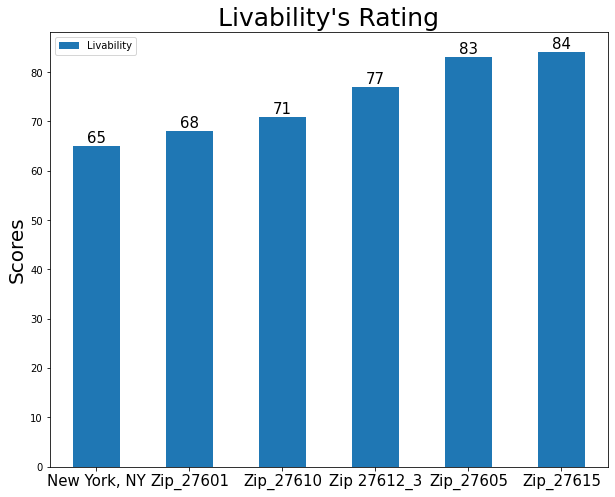

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
single_barplot(new_rating_df.loc[:,['Livability']], ax, "Livability's Rating", '', 'Scores')

plt.show()

> **From the above data, Zip 27612_3, Zip_27605, and Zip_27615 are the optimal areas to move to based on livability. Let's take a closer look at Cost of Living and Housing of these areas with NY due to Northwest Zip 27612_3 was rated low.**

In [34]:
# A function creates 
def cost_living_housing(soup):
    facts = []
    values = []
    info = soup.find('div',{'class':'row', "data-jmp": "av-jl-col"})
    name = info.find('div', {'class': "facts-box-head"})
    data = info.find('div', {'class': "facts-box-body"}).find('em')
    facts.append(name.text.strip())
    values.append(data.text.strip())
    
    info = soup.find('div',{'class':'row', "data-jmp": "av-jl-hou"})
    for name in info.findAll('div', {'class': "facts-box-head"}):
        facts.append(name.text.strip())
    for data in info.findAll('em'):
        values.append(data.text.strip())
    df = pd.DataFrame()
    df['Facts'] = facts
    df['Values'] = values
    return df
    
df_cost_27612_3 = cost_living_housing(liv_soup_27612_3)
df_cost_27615 = cost_living_housing(liv_soup_27615)
df_cost_27605 = cost_living_housing(liv_soup_27605)
df_cost_ny = cost_living_housing(ny_liv_soup)
df_cost_27612_3

,Facts,Values
0,Northwest,110
1,Median home value,"$279,428"
2,Median rent price,$973
3,Home ownership,52%


In [35]:
cost_liv_housing = df_cost_27612_3
cost_liv_housing = cost_liv_housing.rename(columns={'Values': 'Zip_27612_3'})
cost_liv_housing['Zip_27615'] = df_cost_27615['Values'].values
cost_liv_housing['Zip_27605'] = df_cost_27605['Values'].values
cost_liv_housing['New York, NY'] = df_cost_ny['Values'].values
cost_liv_housing = cost_liv_housing.set_index('Facts')
cost_liv_housing.index.name = None

cost_liv_housing= cost_liv_housing.transpose()
cost_liv_housing = cost_liv_housing.rename(columns={'Northwest': 'Cost of Living'})
cost_liv_housing = cost_liv_housing.sort_values(by='Cost of Living')
cost_liv_housing

,Cost of Living,Median home value,Median rent price,Home ownership
Zip_27605,104,"$256,791",$642,20%
Zip_27615,108,"$266,389",$873,63%
Zip_27612_3,110,"$279,428",$973,52%
"New York, NY",161,"$508,900","$1,294",32%


> **This data reflects 2020 and was released from C2ER in January, 2021. This is the most current data available from Areavibes. From this table, Zip_27605 is the most optimal area. However, Zip_27615 and Zip27612_3 are still better to live in than New York, NY because the cost of living and housing are a lot lower than NY even though it was rated as F. In addition, it is too expensive to rent and buy a house in NY even though home ownership is low. Let's take a closer look at Crime and Employment.**

In [36]:
# A function returns a dataframe of crime rating of a location
def crime_rating_data(soup):
    facts = []
    values = []
    info = soup.find('div',{'class':'row', "data-jmp": "av-jl-cri"})
    for name in info.findAll('div', {'class': "facts-box-head"}):
        facts.append(name.text.strip())
    for data in info.findAll('em'):
        values.append(data.text.strip())
    df = pd.DataFrame()
    df['Facts'] = facts
    df['Values'] = values
    
    return df

    
df_cr_27612_3 = crime_rating_data(liv_soup_27612_3)
df_cr_27615 = crime_rating_data(liv_soup_27615)
df_cr_27605 = crime_rating_data(liv_soup_27605)
df_cr_ny = crime_rating_data(ny_liv_soup)
df_cr_27612_3

,Facts,Values
0,Total crime,"1,294"
1,Chance of being a victim,1 in 78
2,Year-over-year crime,-22%


In [37]:
# combine three dataframes together for comparison
crime_df = df_cr_27612_3
crime_df = crime_df.rename(columns={'Values': 'Zip_27612_3'})
crime_df['Zip_27615'] = df_cr_27615['Values'].values
crime_df['Zip_27605'] = df_cr_27605['Values'].values
crime_df['New York, NY'] = df_cr_ny['Values'].values
crime_df = crime_df.set_index('Facts')
crime_df.index.name = None

crime_df = crime_df.transpose()
crime_df = crime_df.rename(columns={'Total crime': 'Total crime per 100k people', 'Year-over-year crime': 'Year-over-year crime(down)' })

crime_df = crime_df.sort_values(by='Total crime per 100k people')
crime_df

,Total crime per 100k people,Chance of being a victim,Year-over-year crime(down)
Zip_27615,"1,193",1 in 84,-22%
Zip_27612_3,"1,294",1 in 78,-22%
Zip_27605,"1,793",1 in 56,-22%
"New York, NY","2,030",1 in 50,-1%


In [38]:
crime_df['Total crime per 100k people']= crime_df['Total crime per 100k people'].str.replace(',', '', regex=True).astype(int)
crime_df


,Total crime per 100k people,Chance of being a victim,Year-over-year crime(down)
Zip_27615,1193,1 in 84,-22%
Zip_27612_3,1294,1 in 78,-22%
Zip_27605,1793,1 in 56,-22%
"New York, NY",2030,1 in 50,-1%


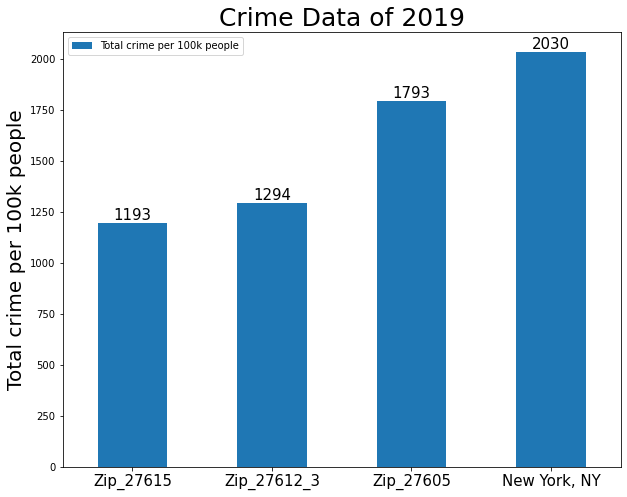

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
single_barplot(crime_df, ax, 'Crime Data of 2019', '', 'Total crime per 100k people')

plt.show()

> **This data reflects the 2019 calendar year and was released from the FBI in September, 2020. This is the most current data available from Areavibes. From this table, Zip_27615 is the most optimal place to live in all with the lowest crime. However, Zip_27612_3 is optimal too.** 


In [40]:
# A function returns a dataframe of employment rating of a location
def employment_rating_data(soup):
    facts = []
    values = []
    
    info = soup.find('div',{'class':'row', "data-jmp": "av-jl-emp"})
    for name in info.findAll('div', {'class': "facts-box-head"}):
        facts.append(name.text.strip())
    for data in info.findAll('em'):
        values.append(data.text.strip())
    df = pd.DataFrame()
    df['Facts'] = facts
    df['Values'] = values
    return df
    
df_em_27612_3 = employment_rating_data(liv_soup_27612_3)
df_em_27615 = employment_rating_data(liv_soup_27615)
df_em_27605 = employment_rating_data(liv_soup_27605)
df_em_ny = employment_rating_data(ny_liv_soup)
df_em_27612_3

,Facts,Values
0,Median household income,"$78,719"
1,Income per capita,"$43,567"
2,Unemployment rate,3%


In [41]:
# combine three dataframes together for comparison
employment_df = df_em_27612_3
employment_df = employment_df.rename(columns={'Values': 'Zip_27612_3'})
employment_df['Zip_27615'] = df_em_27615['Values'].values
employment_df['Zip_27605'] = df_em_27605['Values'].values
employment_df['New York, NY'] = df_em_ny['Values'].values
employment_df = employment_df.set_index('Facts')
employment_df.index.name = None

employment_df = employment_df.transpose()

employment_df = employment_df.sort_values(by='Median household income', ascending=False)
employment_df

,Median household income,Income per capita,Unemployment rate
Zip_27615,"$80,005","$44,373",3%
Zip_27612_3,"$78,719","$43,567",3%
"New York, NY","$55,191","$34,099",5%
Zip_27605,"$50,986","$26,427",2%


In [42]:
employment_df['Median household income']= employment_df['Median household income'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(int)
employment_df['Income per capita']= employment_df['Income per capita'].str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(int)
employment_df['Unemployment rate']= employment_df['Unemployment rate'].str.replace('%', '', regex=True).astype(int)
employment_df

,Median household income,Income per capita,Unemployment rate
Zip_27615,80005,44373,3
Zip_27612_3,78719,43567,3
"New York, NY",55191,34099,5
Zip_27605,50986,26427,2


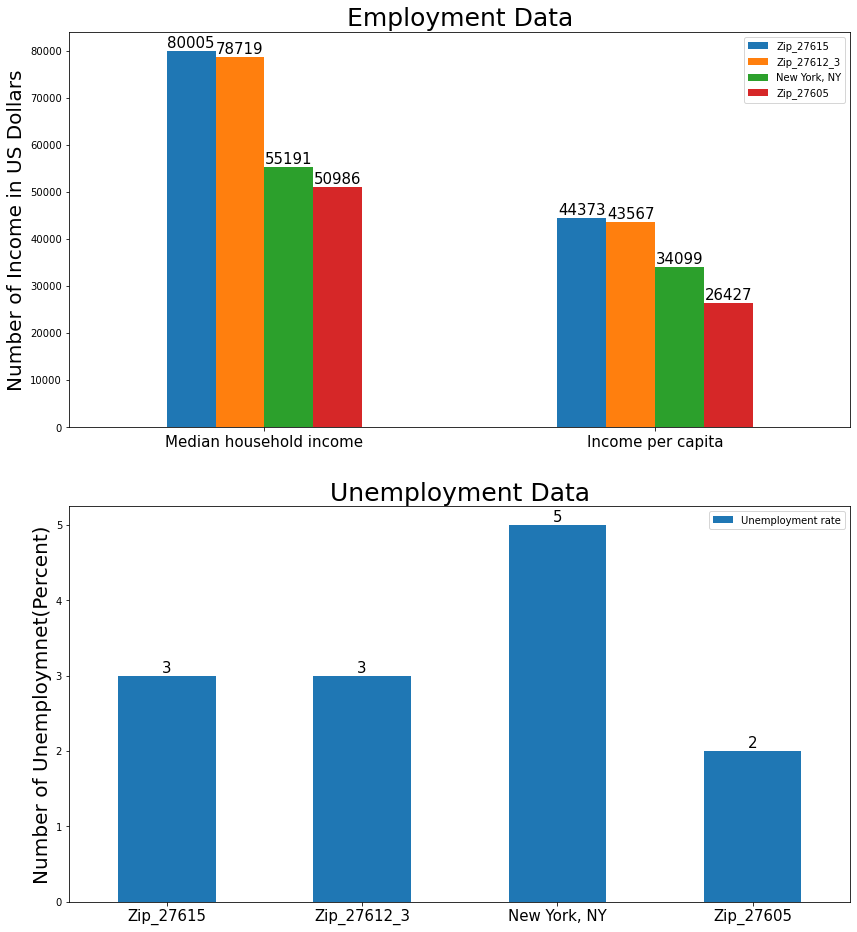

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(14, 16))
single_barplot(employment_df.loc[:, ['Median household income', 'Income per capita']].transpose(), axes[0], 'Employment Data', '', 'Number of Income in US Dollars')
single_barplot(employment_df.loc[:, ['Unemployment rate']], axes[1], 'Unemployment Data', '', 'Number of Unemploymnet(Percent)')
plt.show()

>**From these data above, they shows that Zip_27615 and Zip_27612_3 are optimal areas to move to. Out of all data, Zip 27612, 27613, and 27615 are shown the most optimal areas to live around** 

---

### 3. Explore popular spots around the optimal areas using FourSquare API <a name="step3"></a>

#### <font color='blue'>3.1 Define Foursqure Credentials and Version</font>

In [45]:
# @hidden_cell
CLIENT_ID = 'SZB0QQKFLTMP4YK34ZEQQZC5UH3GXYQWQXRZYJ0EFZG3ZE3M' # your Foursquare ID
CLIENT_SECRET = 'ADXWTGLK0TGGSMCQR4J2SGBDJI3LXJMARRVECVIYE2VENRCZ' # your Foursquare Secret
ACCESS_TOKEN = '0KVNPHPOOZDMV3G4AEJHXGBSOTSWHPQGNJ1FHSJFTGSYUNPJ' # your FourSquare Access Token
VERSION = '20180604'

#### <font color='blue'>3.2 Explore the centroid_zip 27612</font>

> `https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

In [46]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# A function returns a new dataframe of popular spots by exploring a location using FourSqure API     
def explore_a_loc(url_link):

    results = requests.get(url_link).json()
    #print(results)
    
    items = results['response']['groups'][0]['items']
    #print(items)
    
    #Store data into a dataframe using pandas.json_normalize, and filter and prepare data for the popular venues
    dataframe = pd.json_normalize(items) # flatten JSON

    # keep only columns that include name, and anything that is associated with location
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    df_filtered = dataframe.loc[:, filtered_columns]

    # update the category for each row
    df_filtered['venue.categories'] = df_filtered.apply(get_category_type, axis=1)

    # clean columns names by keeping only last term
    df_filtered.columns = [col.split('.')[-1] for col in df_filtered.columns]

    # rename the categories by removing 's to avoid the error for creating markers on the map
    df_filtered['categories'] = df_filtered['categories'].str.replace('\'s', '', regex=True)
    
    return df_filtered

In [47]:
LIMIT = 50
radius = 2000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, centroid_coor[0], centroid_coor[1], VERSION, radius, LIMIT)

# create a new dataframe of popular spots by exploring a location using FourSqure API
pop_spots_df = explore_a_loc(url)
pop_spots_df

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,state,country,formattedAddress,crossStreet,id
0,Shelley Lake Trail,Trail,Millbrook Road,35.857808,-78.662354,"[{'label': 'display', 'lat': 35.85780832693374...",390,27612,US,"Raleigh, NC",Raleigh,NC,United States,"[Millbrook Road, Raleigh, NC 27612, United Sta...",NaN,4ecfaf6b6c2510ace00972d0
1,North Hills Club,Social Club,4824 Yadkin Dr,35.847940,-78.651107,"[{'label': 'display', 'lat': 35.84794009711326...",1147,27609,US,NaN,Raleigh,NC,United States,"[4824 Yadkin Dr (at Six Forks Rd.), Raleigh, N...",at Six Forks Rd.,4af19b69f964a5208fe121e3
2,Harris Teeter,Supermarket,2051 W Millbrook Rd,35.857178,-78.679772,"[{'label': 'display', 'lat': 35.85717816413243...",1726,27612,US,NaN,Raleigh,NC,United States,"[2051 W Millbrook Rd, Raleigh, NC 27612, Unite...",NaN,55aec85e498ed6f72c21bade
3,Mod Pizza,Pizza Place,2071 West Millbrook Road,35.857870,-78.680248,"[{'label': 'display', 'lat': 35.85787031, 'lng...",1783,27612,US,NaN,Raleigh,NC,United States,"[2071 West Millbrook Road (Creedmoor Rd), Rale...",Creedmoor Rd,55d680ed498e3ac844cc1568
4,Relish Craft Kitchen & Bourbon Bar,Café,5625 Creedmoor Rd,35.858261,-78.682087,"[{'label': 'display', 'lat': 35.85826144882770...",1954,27612,US,Northwest Raleigh,Raleigh,NC,United States,"[5625 Creedmoor Rd (at W Millbrook Rd), Raleig...",at W Millbrook Rd,4d7d3bb3645ea35d98aa54f8
5,The Pretty Mane & Company Salon,Cosmetics Shop,6300 Creedmoor Rd Ste 118,35.858195,-78.682148,"[{'label': 'display', 'lat': 35.85819484975609...",1958,27612,US,NaN,Raleigh,NC,United States,"[6300 Creedmoor Rd Ste 118 (Creedmoor Road), R...",Creedmoor Road,4b1ede5ff964a520c82024e3
6,Harmony Farms Natural Foods,Grocery Store,5653 Creedmoor Rd,35.859520,-78.681635,"[{'label': 'display', 'lat': 35.85952018768986...",1950,27612,US,NaN,Raleigh,NC,United States,"[5653 Creedmoor Rd (at Millbrook Rd), Raleigh,...",at Millbrook Rd,4b96d45ef964a52058e734e3
7,North Hills Park,Park,108 Chowan,35.837962,-78.657362,"[{'label': 'display', 'lat': 35.83796158834003...",1868,NaN,US,NaN,Raleigh,NC,United States,"[108 Chowan, Raleigh, NC, United States]",NaN,4ba93bc0f964a520ba163ae3
8,Optimist Pool,Pool,NaN,35.862306,-78.644010,"[{'label': 'display', 'lat': 35.86230606248183...",1756,27609,US,NaN,Raleigh,NC,United States,"[Raleigh, NC 27609, United States]",NaN,4ec4e12f29c224ea7c2672b6
9,Optimist Park,Park,5900 Whittier Dr,35.862661,-78.643351,"[{'label': 'display', 'lat': 35.86266140721754...",1827,27609,US,NaN,Raleigh,NC,United States,"[5900 Whittier Dr (at Northclift Dr), Raleigh,...",at Northclift Dr,4b0073cff964a520653e22e3


#### <font color='blue'>3.3 Let's check which venue is most common near this zip code 27612</font>

In [48]:
count_df = pop_spots_df.groupby(['categories']).count().sort_values(by=['name'], ascending=False)
count_df = count_df.loc[:,['name']]
count_df = count_df.rename(columns={'name': 'counts'})
count_df = count_df.transpose()
count_df

categories,Trail,Park,Supermarket,Pizza Place,Cosmetics Shop,Hotel,Track,Social Club,Sandwich Place,Pool,...,Frozen Yogurt Shop,Fried Chicken Joint,Fast Food Restaurant,Coffee Shop,Chinese Restaurant,Café,Baseball Field,Bar,Bank,Grocery Store
counts,4,4,2,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### <font color='blue'>3.4 Explore the centroid_k8_zip 27613</font>

> `https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

In [49]:
url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, centroid_k8_coor[0], centroid_k8_coor[1], VERSION, radius, LIMIT)

# create a new dataframe of popular spots by exploring a centroid_k8 location using FourSqure API
pop_spots_df2 = explore_a_loc(url2)
pop_spots_df2

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Bowman Animal Hospital and Cat Clinic,Veterinarian,8308 Creedmoor Rd.,35.900764,-78.680213,"[{'label': 'display', 'lat': 35.90076399942757...",721,27613,US,Raleigh,NC,United States,"[8308 Creedmoor Rd., Raleigh, NC 27613, United...",NaN,NaN,4b7d5522f964a520a8b82fe3
1,Duck Donuts,Donut Shop,8323 Creedmoor Road,35.900861,-78.682606,"[{'label': 'entrance', 'lat': 35.901476, 'lng'...",695,27613,US,Raleigh,NC,United States,"[8323 Creedmoor Road (Strickland Rd), Raleigh,...",Strickland Rd,NaN,56a959f9498e312c0d5e82c0
2,Brigs Great Beginnings Restaurant,Breakfast Spot,8111 Creedmoor Rd,35.899433,-78.681772,"[{'label': 'display', 'lat': 35.8994333668823,...",852,27613,US,Raleigh,NC,United States,"[8111 Creedmoor Rd (at Brennan Dr), Raleigh, N...",at Brennan Dr,NaN,4b043886f964a520425222e3
3,Bottle Mixx,Beer Store,8111 Creedmoor Rd Ste 153,35.899265,-78.682270,"[{'label': 'display', 'lat': 35.89926523429639...",871,27613,US,Raleigh,NC,United States,[8111 Creedmoor Rd Ste 153 (Brennan Station Sh...,Brennan Station Shopping Center,NaN,5059dc9ee4b027b66aa31e1e
4,White Dahlia - Massage and Wellness,Massage Studio,8351 Standonshire Way #109,35.901516,-78.679743,"[{'label': 'display', 'lat': 35.9015163, 'lng'...",651,27615,US,Raleigh,NC,United States,[8351 Standonshire Way #109 (at Strickland Rd....,at Strickland Rd.,NaN,4bd9ad15d2cbc928f452d1ad
5,Chow Pizza Bar,Pizza Place,8311 Creedmoor Rd,35.900037,-78.682138,"[{'label': 'display', 'lat': 35.90003650239023...",785,27613,US,Raleigh,NC,United States,"[8311 Creedmoor Rd (at Bandford Way), Raleigh,...",at Bandford Way,NaN,4cdc8d9b4006a143a2a7dfb2
6,Jet's Pizza,Pizza Place,8365 Creedmoor Rd,35.901459,-78.682113,"[{'label': 'display', 'lat': 35.90145932609207...",626,27613,US,Raleigh,NC,United States,"[8365 Creedmoor Rd (at Strickland Rd), Raleigh...",at Strickland Rd,NaN,4ded4448b0fb43a756d8c1df
7,Margaux's Restaurant,American Restaurant,8111 Creedmoor Rd,35.898289,-78.683018,"[{'label': 'display', 'lat': 35.898289, 'lng':...",983,27613,US,Raleigh,NC,United States,"[8111 Creedmoor Rd (at Brennan Dr), Raleigh, N...",at Brennan Dr,NaN,4b75bb37f964a52079202ee3
8,Five Guys,Burger Joint,8107 Creedmoor Road,35.897809,-78.681247,"[{'label': 'display', 'lat': 35.897809, 'lng':...",1034,27613,US,Raleigh,NC,United States,"[8107 Creedmoor Road, Raleigh, NC 27613, Unite...",NaN,NaN,4ae0f90df964a520328421e3
9,Poké Go,Poke Place,8107-110 Creedmoor Rd,35.897874,-78.681286,"[{'label': 'display', 'lat': 35.897874, 'lng':...",1027,27613,US,Raleigh,NC,United States,"[8107-110 Creedmoor Rd (Brennan Station), Rale...",Brennan Station,Northwest Raleigh,59f0cd7435811b17018ec5de


#### <font color='blue'>3.5 Let's check which venue is most common near this zip code 27613</font>

In [50]:
count_df2 = pop_spots_df2.groupby(['categories']).count().sort_values(by=['name'], ascending=False)
count_df2 = count_df2.loc[:,['name']]
count_df2 = count_df2.rename(columns={'name': 'counts'})
count_df2 = count_df2.transpose()
count_df2

categories,Pizza Place,Café,Supermarket,Donut Shop,Mexican Restaurant,Discount Store,American Restaurant,Shipping Store,Poke Place,Pool,...,Golf Course,Flower Shop,Fast Food Restaurant,Farmers Market,Coffee Shop,Burger Joint,Breakfast Spot,Beer Store,Bagel Shop,Weight Loss Center
counts,4,3,3,3,2,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


#### <font color='blue'>3.6 Explore the zip 27615</font>

> `https://api.foursquare.com/v2/venues/`**explore**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&limit=`**LIMIT**

In [51]:
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode('27615, Raleigh, NC')
latitude = location.latitude
longitude = location.longitude
center_27615_coor = [latitude, longitude]

url3 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, center_27615_coor[0], center_27615_coor[1], VERSION, radius, LIMIT)

# create a new dataframe of popular spots by exploring a center of 27615 location using FourSqure API
pop_spots_df3 = explore_a_loc(url3)
pop_spots_df3

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,New York Bagel and Deli,Bagel Shop,7909-121 Falls of Neuse Rd,35.893303,-78.625958,"[{'label': 'display', 'lat': 35.89330305031072...",173,27615,US,Raleigh,NC,United States,"[7909-121 Falls of Neuse Rd, Raleigh, NC 27615...",NaN,NaN,4afee169f964a5202b3122e3
1,Taziki's Mediterranean Cafe - Bent Tree (Tazik...,Mediterranean Restaurant,"7901 Falls Of Neuse Rd, Ste 101",35.893401,-78.626934,"[{'label': 'display', 'lat': 35.89340100000000...",150,27615,US,Raleigh,NC,United States,"[7901 Falls Of Neuse Rd, Ste 101, Raleigh, NC ...",NaN,NaN,5b3bbaec916bc1002ce42b22
2,Jubala Village Coffee,Coffee Shop,8450 Honeycutt Rd,35.895004,-78.622034,"[{'label': 'display', 'lat': 35.8950045, 'lng'...",563,27615,US,Raleigh,NC,United States,"[8450 Honeycutt Rd (at Falls of Neuse Rd), Ral...",at Falls of Neuse Rd,NaN,4d4778f39ba95941a0b44875
3,Farina,Italian Restaurant,"Lafayette Village, 8450 Honeycutt Rd #100",35.895048,-78.621906,"[{'label': 'display', 'lat': 35.89504777798381...",575,27615,US,Raleigh,NC,United States,"[Lafayette Village, 8450 Honeycutt Rd #100, Ra...",NaN,NaN,55c7e326498e95c95d6a6442
4,Crafty Beer Shop,Bar,8450 Honeycutt Rd #108,35.895004,-78.621925,"[{'label': 'display', 'lat': 35.8950036, 'lng'...",571,27615,US,Raleigh,NC,United States,"[8450 Honeycutt Rd #108 (Falls of Neuse), Rale...",Falls of Neuse,NaN,54a45b14498e8bfa138891e3
5,Vinos Finos,Wine Bar,8450 Honeycutt Rd Ste 110,35.894780,-78.621985,"[{'label': 'display', 'lat': 35.89478008046163...",552,27615,US,Raleigh,NC,United States,[8450 Honeycutt Rd Ste 110 (in Lafayette Villa...,in Lafayette Village,NaN,4d33ab072e56236ae85928b4
6,Hibernian Pub,Pub,8021 Falls of Neuse Rd,35.893824,-78.624444,"[{'label': 'display', 'lat': 35.89382449407287...",310,27615,US,Raleigh,NC,United States,"[8021 Falls of Neuse Rd, Raleigh, NC 27615, Un...",NaN,NaN,511560d6e4b03f38709e3c98
7,Pet Mania,Pet Store,7901 Falls of Neuse Rd,35.893108,-78.627682,"[{'label': 'display', 'lat': 35.89310805130366...",127,27615,US,Raleigh,NC,United States,"[7901 Falls of Neuse Rd, Raleigh, NC 27615, Un...",NaN,NaN,4b732db8f964a52020a02de3
8,Lafayette Village,Shopping Mall,8450 Honeycutt Rd,35.895095,-78.621592,"[{'label': 'display', 'lat': 35.89509513883663...",601,27615,US,Raleigh,NC,United States,"[8450 Honeycutt Rd (at Falls of Neuse Rd), Ral...",at Falls of Neuse Rd,NaN,4dfb628881dce49306247d19
9,Savory Spice Shop,Gourmet Shop,8470 Honeycutt Rd,35.894795,-78.621314,"[{'label': 'display', 'lat': 35.89479489073969...",605,27615,US,Raleigh,NC,United States,"[8470 Honeycutt Rd (Lafayette Village), Raleig...",Lafayette Village,NaN,4cbafa75558576b00bac490e


#### <font color='blue'>3.6 Let's check which venue is most common near this zip code 27615</font>

In [52]:
count_df3 = pop_spots_df3.groupby(['categories']).count().sort_values(by=['name'], ascending=False)
count_df3 = count_df3.loc[:,['name']]
count_df3 = count_df3.rename(columns={'name': 'counts'})
count_df3 = count_df3.transpose()
count_df3

categories,American Restaurant,Shopping Mall,Pet Store,Pharmacy,Pub,Gourmet Shop,Sandwich Place,Mediterranean Restaurant,Furniture / Home Store,Spa,...,Dessert Shop,French Restaurant,Lawyer,Gift Shop,Gym,Home Service,Italian Restaurant,Jewelry Store,Juice Bar,Wine Bar
counts,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


#### <font color='blue'>3.7 Let's visualize popular spots(blue markers) nearby the zip codes on the map</font>


### <Center>Color Code Chart for Reading the Map</Center>

| Facts |Colored Markers |
| ------------- |:-------------:| 
| Centroids | <font color='red'>red</font> |
| Top-Rated Schools| <font color='green'>green</font> |
| Popular Spots | <font color='blue'>blue</font> |


In [53]:
df_marks_toMap(pop_spots_df, 5, 'blue', nc_map)
one_mark_toMap(centroid_k8_coor, 15, "Centroid zip: 27613", 'red', nc_map)
df_marks_toMap(pop_spots_df2, 5, 'blue', nc_map)
one_mark_toMap(center_27615_coor, 15, "Centroid zip: 27615", 'red', nc_map)
df_marks_toMap(pop_spots_df3, 5, 'blue', nc_map)
nc_map

---

### 4. Get Current "House For Sale" and "House For Rent" Data <a name="step4"></a>


#### <font color='blue'>4.1 Webscraping "house for sale" data around the zipcode: 27612 from Zillow</font>


In [54]:
url_link='https://www.zillow.com/homes/{}_rb/'.format(centroid_zip)

def request_zillow_soup(link, pages):
    # Initialize the header for scraping "house for rent" data from Zillow 
    Header = {
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36',
        'referer': link
    }

    with requests.session() as s:
        page = 1
        end_page = pages
        url = ''
        url_list = []

        # add each page url in "url_list"
        while page <= end_page:
            url =link + f'{page}_p/'
            url_list.append(url)
            page += 1

        request = ''
        request_list = []

        # add each request in "request_list"
        for url in url_list:
            request = s.get(url, headers=Header)
            request_list.append(request)

    soup_list = []

    # create each Beautiful Soup object and add in "soup_list"
    for request in request_list:
        bsobj = BeautifulSoup(request.content, 'html.parser')
        soup_list.append(bsobj)
    return soup_list

sale_soup=request_zillow_soup(url_link, 1)

# sale_soup   # this line was commented out to avoid displaying the lengthy sources, please see following data


In [55]:
# sale_soup[0].findAll('article')   # this line was commented out to avoid displaying the lengthy sources, please see following data


In [56]:
# A function return a dataframe with the scraped sale data from zillow
def scrape_sale_df(soups):
    prices = []
    features = [] # store sale info 
    address = []
    urls = []

    for soup in soups:
        for listing in soup.findAll('div',{'class':'list-card-heading'}):
            if listing.text == "":
                pass
            else:
                p = listing.find('div',{'class':'list-card-price'})
                prices.append(p.text.strip())
                info = listing.find('ul',{'class':'list-card-details'})
                sale_info = info.text.replace('bds','bds, ').replace('ba','ba, ').replace(' sqft-',' sqft, ').strip() 
                features.append(sale_info)

        for adr in soup.findAll(class_='list-card-addr'):
            if adr.text == "":
                pass
            else:
                address.append(adr.text.strip().split('|')[-1])

        for href_link in soup.find_all('article'):
            if href_link.text == '':
                pass
            else:
                href = href_link.find('a', class_='list-card-link')
                link = re.findall('"/.*/"|"https:.*/"', str(href))
                if re.match('"https:', link[0]):
                    url_link = link[0].replace('"', '')
                    #print(url_link)
                else:
                    url_link = 'https://www.zillow.com' + link[0].replace('"', '')
                    #print(url_link)
                urls.append(url_link)
                
    df = pd.DataFrame()
    df['SalePrices'] = prices
    df['Features'] = features    
    df['Address'] = address
    df['List_Link'] = urls
    return df

# create a data frame of houses for sale
sale_27612_df = scrape_sale_df(sale_soup)
pd.set_option('max_colwidth', None)
sale_27612_df

,SalePrices,Features,Address,List_Link
0,"$600,000","4 bds, 3 ba, 2,957 sqft, Coming soon","4016 Windflower Ln, Raleigh, NC 27612",https://www.zillow.com/homedetails/4016-Windflower-Ln-Raleigh-NC-27612/125275197_zpid/
1,"$999,900",4.4 acres lot- Lot / Land for sale,"8806 Albright Rd, Raleigh, NC 27612",https://www.zillow.com/homedetails/8806-Albright-Rd-Raleigh-NC-27612/6541485_zpid/
2,"$529,000","3 bds, 3 ba, 2,767 sqft, Townhouse for sale","3117 Bentley Hill Rd, Raleigh, NC 27612",https://www.zillow.com/homedetails/3117-Bentley-Hill-Rd-Raleigh-NC-27612/50111130_zpid/
3,"$229,900","3 bds, 2 ba, 1,537 sqft, Condo for sale","4709 Edwards Mill Rd APT E, Raleigh, NC 27612",https://www.zillow.com/homedetails/4709-Edwards-Mill-Rd-APT-E-Raleigh-NC-27612/2069188311_zpid/
4,"$340,000","3 bds, 4 ba, 1,838 sqft, Townhouse for sale","8816 Orchard Grove Way, Raleigh, NC 27612",https://www.zillow.com/homedetails/8816-Orchard-Grove-Way-Raleigh-NC-27612/71845655_zpid/
5,"$925,000","5 bds, 6 ba, 4,740 sqft, House for sale","2601 Shadow Hills Ct, Raleigh, NC 27612",https://www.zillow.com/homedetails/2601-Shadow-Hills-Ct-Raleigh-NC-27612/89495944_zpid/
6,"$1,599,900","4 bds, 4 ba, 4,080 sqft, New construction","3412 Edgemont Dr, Raleigh, NC 27612",https://www.zillow.com/homedetails/3412-Edgemont-Dr-Raleigh-NC-27612/6433959_zpid/
7,"$215,000","2 bds, 2 ba, 975 sqft, Condo for sale","4601 Timbermill Ct APT 303, Raleigh, NC 27612",https://www.zillow.com/homedetails/4601-Timbermill-Ct-APT-303-Raleigh-NC-27612/133200273_zpid/
8,"$695,000","5 bds, 4 ba, 4,585 sqft, Coming soon","7909 Ocoee Ct, Raleigh, NC 27612",https://www.zillow.com/homedetails/7909-Ocoee-Ct-Raleigh-NC-27612/6521584_zpid/



#### <font color='blue'>4.2 Webscraping "house for rent" data around the zipcode: 27612 from Zillow</font>

In [57]:
url_link='https://www.zillow.com/raleigh-nc-{}/rentals/'.format(centroid_zip)

rent_soup=request_zillow_soup(url_link, 1)

#rent_soup  # this line was commented out to avoid displaying the lengthy sources, please see the data below


In [58]:
#rent_soup[0].findAll('article')  # this line was commented out to avoid displaying the lengthy sources, please see the data below


In [59]:
# A function return a dataframe with the scraped rental data from zillow
def scrape_rent_df(soups):
    features = [] # store sale info 
    address = []
    urls = []

    for soup in soups:
        for listing in soup.findAll('div',{'class':'list-card-heading'}):
            if listing.text == "":
                pass
            else:
                sale_info = listing.text.replace('dio','dio, ').replace('mo','mo ').replace('bds','bds, ').replace('bd$','bd, $').replace('ba','ba, ').replace(' sqft-',' sqft, ').strip() 
                features.append(sale_info)

        for adr in soup.findAll(class_='list-card-addr'):
            if adr.text == "":
                pass
            else:
                address.append(adr.text.strip().split('|')[-1])

        for href_link in soup.find_all('article'):
            if href_link.text == '':
                pass
            else:
                href = href_link.find('a', class_='list-card-link')
                link = re.findall('"/.*/"|"https:.*/"', str(href))
                if re.match('"https:', link[0]):
                    url_link = link[0].replace('"', '')
                    #print(url_link)
                else:
                    url_link = 'https://www.zillow.com' + link[0].replace('"', '')
                    #print(url_link)
                urls.append(url_link)


    df = pd.DataFrame()
    df['Features'] = features    
    df['Address'] = address
    df['List_Link'] = urls
    return df

# create a data frame of houses for rent
rent_27612_df = scrape_rent_df(rent_soup)
pd.set_option('max_colwidth', None)
rent_27612_df

,Features,Address,List_Link
0,"$1,265+ 1 bd, $1,554+ 2 bds,","4800 Waterford Point Dr, Raleigh, NC",https://www.zillow.com/b/pointe-at-crabtree-raleigh-nc-5Xhyg5/
1,"$1,215+ 1 bd, $1,477+ 2 bds,","3939 Glenwood Ave, Raleigh, NC",https://www.zillow.com/b/sterling-glenwood-apartments-raleigh-nc-5XhyXB/
2,"$1,230+ 1 bd, $1,625+ 2 bds,","2105 Ravenglass Pl, Raleigh, NC",https://www.zillow.com/b/the-quinn-on-ravenglass-raleigh-nc-5XhynQ/
3,"$1,045+ 1 bd, $1,455+ 2 bds,","5600 Briar Oak Ln, Raleigh, NC",https://www.zillow.com/b/duraleigh-woods-raleigh-nc-5XhygX/
4,"$1,559+ 1 bd, $1,769+ 2 bds,","4703 Summit Overlook Dr, Raleigh, NC",https://www.zillow.com/b/camden-overlook-raleigh-nc-5XhyXb/
5,"$1,215+ 1 bd, $1,370+ 2 bds, $1,660 3 bds,","1914 Generation Dr, Raleigh, NC",https://www.zillow.com/b/the-trails-of-north-hills-raleigh-nc-BKTpP2/
6,"$1,609+ 1 bd, $1,932+ 2 bds,","4451 Vilana Rdg, Raleigh, NC",https://www.zillow.com/b/marq-at-crabtree-raleigh-nc-63Q237/
7,"$1,150+ 2 bds, $1,350+ 3 bds,","4009 Deep Hollow Dr, Raleigh, NC",https://www.zillow.com/b/enclave-%40-crabtree-raleigh-nc-5XhyYm/
8,"$1,535+ 1 bd, $1,785+ 2 bds, $2,435+ 3 bds,","3950 Fairsted Dr, Raleigh, NC",https://www.zillow.com/b/marshall-park-apartments-%26-townhomes-raleigh-nc-63Zh5Z/


> **Now, we have all information about houses for sale and rent around this zip code. Let's visualize them on the map.**

#### <font color='blue'>4.3 Get the coordinates of these houses for sale and rent around the zipcode: 27612</font>

In [60]:
# A function return a list of coordinates of a group of addresses and a new dataframe
def mult_addr_coordinates(df):
    coordinates = []
    i = 0
    new_df = df
    for addr in df.Address:
        try:
            geolocator = Nominatim(user_agent="foursquare_agent")
            location = geolocator.geocode(addr)
            latitude = location.latitude
            longitude = location.longitude
            coordinates.append([latitude, longitude])
            i += 1
        except:
            print("Can't locate the coordinates for: ", addr)
            new_df = df.drop([i])
            i += 1
            df = new_df
    new_df.reset_index(drop=True, inplace=True)
    return (coordinates, new_df)

# get the new house for sale list and coordinates
sale_27612_coors, sale_27612_df = mult_addr_coordinates(sale_27612_df)
print(sale_27612_coors)

sale_27612_df

Can't locate the coordinates for:  8806 Albright Rd, Raleigh, NC 27612
Can't locate the coordinates for:  4709 Edwards Mill Rd APT E, Raleigh, NC 27612
Can't locate the coordinates for:  4601 Timbermill Ct APT 303, Raleigh, NC 27612
[[35.83253773469388, -78.69167893877551], [35.823377, -78.702607], [35.880866662503394, -78.74616107269895], [35.85584125, -78.67541092408531], [35.82722563863289, -78.69812291682494], [35.875561408163264, -78.74009665306122]]


,SalePrices,Features,Address,List_Link
0,"$600,000","4 bds, 3 ba, 2,957 sqft, Coming soon","4016 Windflower Ln, Raleigh, NC 27612",https://www.zillow.com/homedetails/4016-Windflower-Ln-Raleigh-NC-27612/125275197_zpid/
1,"$529,000","3 bds, 3 ba, 2,767 sqft, Townhouse for sale","3117 Bentley Hill Rd, Raleigh, NC 27612",https://www.zillow.com/homedetails/3117-Bentley-Hill-Rd-Raleigh-NC-27612/50111130_zpid/
2,"$340,000","3 bds, 4 ba, 1,838 sqft, Townhouse for sale","8816 Orchard Grove Way, Raleigh, NC 27612",https://www.zillow.com/homedetails/8816-Orchard-Grove-Way-Raleigh-NC-27612/71845655_zpid/
3,"$925,000","5 bds, 6 ba, 4,740 sqft, House for sale","2601 Shadow Hills Ct, Raleigh, NC 27612",https://www.zillow.com/homedetails/2601-Shadow-Hills-Ct-Raleigh-NC-27612/89495944_zpid/
4,"$1,599,900","4 bds, 4 ba, 4,080 sqft, New construction","3412 Edgemont Dr, Raleigh, NC 27612",https://www.zillow.com/homedetails/3412-Edgemont-Dr-Raleigh-NC-27612/6433959_zpid/
5,"$695,000","5 bds, 4 ba, 4,585 sqft, Coming soon","7909 Ocoee Ct, Raleigh, NC 27612",https://www.zillow.com/homedetails/7909-Ocoee-Ct-Raleigh-NC-27612/6521584_zpid/


In [61]:
# get the new "house for rent" list and coordinates
rent_27612_coors, rent_27612_df = mult_addr_coordinates(rent_27612_df)
print(rent_27612_coors)

rent_27612_df

Can't locate the coordinates for:   4451 Vilana Rdg, Raleigh, NC
[[35.858661, -78.714843], [35.790933, -78.646841], [35.84936546246927, -78.6740761501229], [35.855708, -78.713876], [35.84549, -78.6750665], [35.839114157525515, -78.66602990938338], [35.853226, -78.705738], [35.83208075, -78.67949621059434]]


,Features,Address,List_Link
0,"$1,265+ 1 bd, $1,554+ 2 bds,","4800 Waterford Point Dr, Raleigh, NC",https://www.zillow.com/b/pointe-at-crabtree-raleigh-nc-5Xhyg5/
1,"$1,215+ 1 bd, $1,477+ 2 bds,","3939 Glenwood Ave, Raleigh, NC",https://www.zillow.com/b/sterling-glenwood-apartments-raleigh-nc-5XhyXB/
2,"$1,230+ 1 bd, $1,625+ 2 bds,","2105 Ravenglass Pl, Raleigh, NC",https://www.zillow.com/b/the-quinn-on-ravenglass-raleigh-nc-5XhynQ/
3,"$1,045+ 1 bd, $1,455+ 2 bds,","5600 Briar Oak Ln, Raleigh, NC",https://www.zillow.com/b/duraleigh-woods-raleigh-nc-5XhygX/
4,"$1,559+ 1 bd, $1,769+ 2 bds,","4703 Summit Overlook Dr, Raleigh, NC",https://www.zillow.com/b/camden-overlook-raleigh-nc-5XhyXb/
5,"$1,215+ 1 bd, $1,370+ 2 bds, $1,660 3 bds,","1914 Generation Dr, Raleigh, NC",https://www.zillow.com/b/the-trails-of-north-hills-raleigh-nc-BKTpP2/
6,"$1,150+ 2 bds, $1,350+ 3 bds,","4009 Deep Hollow Dr, Raleigh, NC",https://www.zillow.com/b/enclave-%40-crabtree-raleigh-nc-5XhyYm/
7,"$1,535+ 1 bd, $1,785+ 2 bds, $2,435+ 3 bds,","3950 Fairsted Dr, Raleigh, NC",https://www.zillow.com/b/marshall-park-apartments-%26-townhomes-raleigh-nc-63Zh5Z/


#### <font color='blue'>4.4 Let's visualize "houses for sale"(<font color='purple'>purple markers</font>) and "houses for rent"(<font color='orange'>orange markers</font>) on the map</font>

### <Center>Color Code Chart for Reading the Map</Center>

| Facts |Colored Markers |
| ------------- |:-------------:| 
| Centroids | <font color='red'>red</font> |
| Top-Rated Schools| <font color='green'>green</font> |
| Popular Spots | <font color='blue'>blue</font> |
| Houses for Sale | <font color='purple'>purple</font> |
| Houses for Rent | <font color='orange'>orange</font> |


In [62]:
mul_marks_toMap(sale_27612_coors, 7, sale_27612_df.Address, 'purple', nc_map)
mul_marks_toMap(rent_27612_coors, 7, rent_27612_df.Address, 'orange', nc_map)

# display map
nc_map

#### <font color='blue'>4.5 Find "Houses for Sale" around the centroid zip: 27613 from the top rated K-8 schools</font>

In [63]:
url_link='https://www.zillow.com/homes/{}_rb/'.format(k8_zip)
sale_soup2=request_zillow_soup(url_link, 1)
sale_27613_df = scrape_sale_df(sale_soup2)
sale_27613_df

,SalePrices,Features,Address,List_Link
0,"$300,000","3 bds, 2 ba, 1,468 sqft, Coming soon","2404 Boothbay Ct, Raleigh, NC 27613",https://www.zillow.com/homedetails/2404-Boothbay-Ct-Raleigh-NC-27613/6465942_zpid/
1,"$402,500","3 bds, 2 ba, 2,151 sqft, House for sale","8808 Sleepy Creek Dr, Raleigh, NC 27613",https://www.zillow.com/homedetails/8808-Sleepy-Creek-Dr-Raleigh-NC-27613/6456986_zpid/
2,$--,"-- bds, -- ba, -- sqft, New construction","Available Soon Plan, Parc at Leesville",https://www.zillow.com/community/parc-at-leesville/2068821529_zpid/
3,"$395,000","4 bds, 3 ba, 2,061 sqft, Coming soon","4105 Betterton Dr, Raleigh, NC 27613",https://www.zillow.com/homedetails/4105-Betterton-Dr-Raleigh-NC-27613/6486698_zpid/
4,"$900,000",14.35 acres lot- Lot / Land for sale,"9900 Ray Rd, Raleigh, NC 27613",https://www.zillow.com/homedetails/9900-Ray-Rd-Raleigh-NC-27613/132181563_zpid/
5,"$550,000","4 bds, 2 ba, 2,860 sqft, Coming soon","8841 Woodyhill Rd, Raleigh, NC 27613",https://www.zillow.com/homedetails/8841-Woodyhill-Rd-Raleigh-NC-27613/6462129_zpid/
6,"$1,092,900+","4 bds, 4 ba, 4,000 sqft, New construction","Walden Pond Plan, The Overlook",https://www.zillow.com/community/overlook/2070274665_zpid/
7,"$550,000","4 bds, 3 ba, 3,004 sqft, Coming soon","5412 Glorietta Cir, Raleigh, NC 27613",https://www.zillow.com/homedetails/5412-Glorietta-Cir-Raleigh-NC-27613/65343996_zpid/
8,"$1,649,000","4 bds, 7 ba, 6,819 sqft, House for sale","9805 Najma St, Raleigh, NC 27613",https://www.zillow.com/homedetails/9805-Najma-St-Raleigh-NC-27613/71898549_zpid/


#### <font color='blue'>4.5 Find "Houses for Rent" around the centroid zip: 27613 from the top rated K-8 schools</font>

In [64]:
url_link='https://www.zillow.com/raleigh-nc-{}/rentals/'.format(k8_zip)
rent_soup2=request_zillow_soup(url_link, 1)
rent_27613_df = scrape_rent_df(rent_soup2)
rent_27613_df

,Features,Address,List_Link
0,"$1,595/mo 2 bds, 2.5 ba, 1,276 sqft, Townhouse for rent","8235 City Loft Ct, Raleigh, NC 27613",https://www.zillow.com/homedetails/8235-City-Loft-Ct-Raleigh-NC-27613/60534333_zpid/
1,"$1,358+ 1 bd, $1,518+ 2 bds, $1,723+ 3 bds,","3300 Grove At Crabtree Cres, Raleigh, NC",https://www.zillow.com/b/colonial-grand-at-crabtree-valley-raleigh-nc-BLXsST/
2,"$1,267+ 1 bd, $1,327+ 2 bds,","3801 Glen Verde Trl, Raleigh, NC",https://www.zillow.com/b/rose-heights-apartments-raleigh-nc-5XhynZ/
3,"$1,349+ 1 bd, $1,729+ 2 bds, $1,929+ 3 bds,","5200 Summit Manor Ln, Raleigh, NC",https://www.zillow.com/b/camden-crest-raleigh-nc-5XhyYF/
4,"$1,214+ 1 bd, $1,543+ 2 bds,","3111 Long Meadow Ct, Raleigh, NC",https://www.zillow.com/b/laurel-oaks-raleigh-nc-5Xhyd6/
5,"$1,170+ 1 bd, $1,495+ 2 bds, $1,660 3 bds,","4101 Lake Lynn Dr, Raleigh, NC",https://www.zillow.com/b/bridgeport-raleigh-nc-5XhygM/
6,"$1,223+ 1 bd, $1,422+ 2 bds,","6200 Riese Dr, Raleigh, NC",https://www.zillow.com/b/andover-at-crabtree-raleigh-nc-5XhyfG/
7,"$1,238+ 1 bd, $1,250+ 2 bds,","3000 Inland Trl, Raleigh, NC",https://www.zillow.com/b/regatta-at-lake-lynn-raleigh-nc-5Xhygp/
8,"$1,125+ 1 bd, $1,475 2 bds,","3221 Lynn Ridge Dr, Raleigh, NC",https://www.zillow.com/b/sailboat-bay-raleigh-nc-5Xhyjc/


> **Now, we have all information about houses for sale and rent around this zip code 27613. Let's visualize them on the map.**

#### <font color='blue'>4.6 Get the coordinates of these houses for sale and rent around the k8_zip: 27613</font>

In [65]:
# get the new house for sale list and coordinates
sale_27613_coors, sale_27613_df = mult_addr_coordinates(sale_27613_df)

# get the new "house for rent" list and coordinates
rent_27613_coors, rent_27613_df = mult_addr_coordinates(rent_27613_df)


Can't locate the coordinates for:  8808 Sleepy Creek Dr, Raleigh, NC 27613
Can't locate the coordinates for:  Available Soon Plan, Parc at Leesville
Can't locate the coordinates for:  8841 Woodyhill Rd, Raleigh, NC 27613
Can't locate the coordinates for:  Walden Pond Plan, The Overlook
Can't locate the coordinates for:  9805 Najma St, Raleigh, NC 27613
Can't locate the coordinates for:   3300 Grove At Crabtree Cres, Raleigh, NC


#### <font color='blue'>4.7 Let's visualize "houses for sale"(<font color='purple'>purple markers</font>) and "houses for rent"(<font color='orange'>orange markers</font>) on the map near the centroid zip: 27613, k-8 schools</font>

In [66]:
mul_marks_toMap(sale_27613_coors, 7, sale_27613_df.Address, 'purple', nc_map)
mul_marks_toMap(rent_27613_coors, 7, rent_27613_df.Address, 'orange', nc_map)

# display map
nc_map

#### <font color='blue'>4.8 Find "Houses for Sale" around the zip: 27615</font>


In [67]:
url_link='https://www.zillow.com/homes/{}_rb/'.format('27615')
sale_soup3=request_zillow_soup(url_link, 1)
sale_27615_df = scrape_sale_df(sale_soup3)
sale_27615_df

,SalePrices,Features,Address,List_Link
0,"$360,000","3 bds, 3 ba, 2,213 sqft, Coming soon","530 Weathergreen Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/530-Weathergreen-Dr-Raleigh-NC-27615/6478013_zpid/
1,"$350,000","4 bds, 3 ba, 2,112 sqft, Coming soon","9320 Carisbrook Ct, Raleigh, NC 27615",https://www.zillow.com/homedetails/9320-Carisbrook-Ct-Raleigh-NC-27615/6531083_zpid/
2,"$265,000","3 bds, 2 ba, 1,522 sqft, House for sale","313 Crown Oaks Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/313-Crown-Oaks-Dr-Raleigh-NC-27615/6466653_zpid/
3,"$279,900","3 bds, 3 ba, 2,268 sqft, Condo for sale","6529 New Market Way #1, Raleigh, NC 27615",https://www.zillow.com/homedetails/6529-New-Market-Way-1-Raleigh-NC-27615/2068606066_zpid/
4,"$275,000","3 bds, 2 ba, 1,382 sqft, Coming soon","7937 Brown Bark Pl, Raleigh, NC 27615",https://www.zillow.com/homedetails/7937-Brown-Bark-Pl-Raleigh-NC-27615/6470905_zpid/
5,"$250,000","2 bds, 3 ba, 1,543 sqft, Coming soon","900 Bridge Way, Raleigh, NC 27615",https://www.zillow.com/homedetails/900-Bridge-Way-Raleigh-NC-27615/6471478_zpid/
6,"$589,000","4 bds, 3 ba, 3,771 sqft, House for sale","2301 Valley Forge Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/2301-Valley-Forge-Dr-Raleigh-NC-27615/6460853_zpid/
7,"$425,000","3 bds, 2 ba, 1,314 sqft, House for sale","7405 Valley Run Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/7405-Valley-Run-Dr-Raleigh-NC-27615/6468550_zpid/
8,"$409,900","3 bds, 2 ba, 1,470 sqft, Coming soon","6729 Van Haven Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/6729-Van-Haven-Dr-Raleigh-NC-27615/6441056_zpid/


#### <font color='blue'>4.9 Find "Houses for Rent" around the zip: 27615</font>

In [68]:
url_link='https://www.zillow.com/raleigh-nc-{}/rentals/'.format('27615')
rent_soup3=request_zillow_soup(url_link, 1)
rent_27615_df = scrape_rent_df(rent_soup3)
rent_27615_df

,Features,Address,List_Link
0,"$1,170+/mo 1 bd1 ba, 690 sqft, Apartment for rent","7303 Bryn Athyn Way #5KWCKJ3BB, Raleigh, NC 27615",https://www.zillow.com/homedetails/7303-Bryn-Athyn-Way-5KWCKJ3BB-Raleigh-NC-27615/2090957290_zpid/
1,"$1,800/mo 4 bds, 2.5 ba, 2,250 sqft, Townhouse for rent","747 Weathergreen Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/747-Weathergreen-Dr-Raleigh-NC-27615/6469824_zpid/
2,"$1,455/mo 3 bds, 2.5 ba, 1,383 sqft, House for rent","7223 Sandy Creek Dr, Raleigh, NC 27615",https://www.zillow.com/homedetails/7223-Sandy-Creek-Dr-Raleigh-NC-27615/132229950_zpid/
3,"$1,265+ 1 bd, $1,710+ 2 bds, $1,755 3 bds,","8810 Autumn Winds Dr, Raleigh, NC",https://www.zillow.com/b/the-village-apartments-raleigh-nc-5XhyjX/
4,"$1,438+ 1 bd, $1,599+ 2 bds, $1,946 3 bds,","110 Talisman Way, Raleigh, NC",https://www.zillow.com/b/junction-six-forks-raleigh-nc-5g3RJr/
5,"$1,440 1 bd, $1,295+ 2 bds,","2525 Pavilion Pl, Raleigh, NC",https://www.zillow.com/b/legacy-north-pointe-apartments-raleigh-nc-5Xhyfr/
6,"$1,700/mo 3 bds, 3 ba, 1,520 sqft, Townhouse for rent","102 Wythe Cir, Raleigh, NC 27615",https://www.zillow.com/homedetails/102-Wythe-Cir-Raleigh-NC-27615/6469817_zpid/
7,"$1,295/mo 2 bds, 1.5 ba, 1,250 sqft, Townhouse for rent","7205 Harps Mill Rd, Raleigh, NC 27615",https://www.zillow.com/homedetails/7205-Harps-Mill-Rd-Raleigh-NC-27615/50098649_zpid/
8,"$1,795/mo 3 bds, 2.5 ba, 1,607 sqft, Townhouse for rent","7004 Racine Way, Raleigh, NC 27615",https://www.zillow.com/homedetails/7004-Racine-Way-Raleigh-NC-27615/82676290_zpid/


> **Now, we have all information about houses for sale and rent around this zip code 27615. Let's visualize them on the map.**

#### <font color='blue'>4.10 Get the coordinates of these houses for sale and rent around the zip: 27615</font>

In [69]:
# get the new house for sale list and coordinates
sale_27615_coors, sale_27615_df = mult_addr_coordinates(sale_27615_df)

# get the new "house for rent" list and coordinates
rent_27615_coors, rent_27615_df = mult_addr_coordinates(rent_27615_df)

Can't locate the coordinates for:  6529 New Market Way #1, Raleigh, NC 27615
Can't locate the coordinates for:  2301 Valley Forge Dr, Raleigh, NC 27615
Can't locate the coordinates for:  7303 Bryn Athyn Way #5KWCKJ3BB, Raleigh, NC 27615


#### <font color='blue'>4.11 Let's visualize "houses for sale"(<font color='purple'>purple markers</font>) and "houses for rent"(<font color='orange'>orange markers</font>) on the map near the zip: 27615</font>

In [70]:
mul_marks_toMap(sale_27615_coors, 7, sale_27615_df.Address, 'purple', nc_map)
mul_marks_toMap(rent_27615_coors, 7, rent_27615_df.Address, 'orange', nc_map)

# display map
nc_map

---

### 5. Search for a specific venue category<a name="step5"></a>
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&oauth_token=`**ACCESS_TOKEN**`&v=`**VERSION**`&query=`**search_query**`&radius=`**RADIUS**`&limit=`**LIMIT**

**The stakeholder is craving Itilian or Chinese food. So, let’s define a query to search for Italian food and Chinese food that is within 5000 meters from the centroid 27615.**

In [71]:
# a function returns a dataframe of a specific venue by searching using FourSqure API
def search_a_venue(url_link):
    results = requests.get(url_link).json()
    
    # assign relevant part of JSON to venues
    venues = results['response']['venues']

    # tranform venues into a dataframe
    dataframe = pd.json_normalize(venues)
    
    # keep only columns that include venue name, and anything that is associated with location
    filtered_columns = ['id'] + ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')]
    df_filtered = dataframe.loc[:, filtered_columns]
    
    # filter the category for each row
    df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

    # clean column names by keeping only last term
    df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]
    
    # rename the categories by removing 's to avoid the error for creating markers on the map
    df_filtered['categories'] = df_filtered['categories'].str.replace('\'s', '', regex=True)
    
    return df_filtered

limit = 50
radius = 5000

search_query = 'Italian Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, center_27615_coor[0], center_27615_coor[1], ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

italian_df = search_a_venue(url)
italian_df = italian_df.dropna(subset=['categories','address'])
italian_df = italian_df.loc[italian_df.categories.str.contains('Italian Restaurant'), italian_df.columns]
italian_df.reset_index(drop=True, inplace=True)
italian_df

,id,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet
0,4b326152f964a520120a25e3,Italian Kitchen,Italian Restaurant,4005 Wake Forest Rd,35.835394,-78.615093,"[{'label': 'display', 'lat': 35.835393674496224, 'lng': -78.61509298371625}, {'label': 'entrance', 'lat': 35.835655, 'lng': -78.615251}]",6400,27609,US,Raleigh,NC,United States,"[4005 Wake Forest Rd, Raleigh, NC 27609]",NaN
1,4b760c30f964a5200e392ee3,Nina's Ristorante,Italian Restaurant,8801 Lead Mine Rd,35.905173,-78.656968,"[{'label': 'display', 'lat': 35.90517346208298, 'lng': -78.65696774540785}, {'label': 'entrance', 'lat': 35.905223, 'lng': -78.657106}]",3062,27615,US,Raleigh,NC,United States,"[8801 Lead Mine Rd, Raleigh, NC 27615]",NaN
2,4e9f414e93add232e748d496,Mia Francesca Trattoria,Italian Restaurant,4100 Main At North Hills St,35.836218,-78.643951,"[{'label': 'display', 'lat': 35.8362182367447, 'lng': -78.64395114306092}]",6399,27609,US,Raleigh,NC,United States,"[4100 Main At North Hills St (in North Hills), Raleigh, NC 27609]",in North Hills
3,4c6ab44f3d8bc9b605118d90,Capri Restaurant,Italian Restaurant,6325-17 Falls of Neuse Rd,35.868659,-78.622269,"[{'label': 'display', 'lat': 35.86865910463733, 'lng': -78.62226908405017}]",2641,27615,US,Raleigh,NC,United States,"[6325-17 Falls of Neuse Rd, Raleigh, NC 27615]",NaN
4,4f7de2276b7478c17cbc5ad5,Vesuvios Italian Kitchen,Italian Restaurant,7400 Six Forks Rd,35.881573,-78.645271,"[{'label': 'entrance', 'lat': 35.881263, 'lng': -78.645557}, {'label': 'display', 'lat': 35.88157272338867, 'lng': -78.64527130126953}]",2011,27615,US,Raleigh,NC,United States,"[7400 Six Forks Rd, Raleigh, NC 27615]",NaN


In [72]:
search_query = 'Chinese Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, center_27615_coor[0], center_27615_coor[1], ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)

chinese_df = search_a_venue(url)
chinese_df = chinese_df.dropna(subset=['categories','address'])
chinese_df = chinese_df.loc[chinese_df.categories.str.contains('Chinese Restaurant'), chinese_df.columns]
chinese_df.reset_index(drop=True, inplace=True)
chinese_df

,id,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet
0,4f328ad219836c91c7e1f9cf,Eastern Chinese Restaurant,Chinese Restaurant,9650 Strickland Rd,35.903823,-78.656052,"[{'label': 'display', 'lat': 35.903822999999996, 'lng': -78.656052}, {'label': 'entrance', 'lat': 35.904752, 'lng': -78.656829}]",2919,27615,US,Raleigh,NC,United States,"[9650 Strickland Rd, Raleigh, NC 27615]",NaN
1,4b9ae20af964a5203fdf35e3,King's Wok,Chinese Restaurant,8320-160 Litchford Rd,35.892808,-78.600528,"[{'label': 'display', 'lat': 35.89280830722444, 'lng': -78.60052785809832}]",2399,27615,US,Raleigh,NC,United States,"[8320-160 Litchford Rd (Harps Mill), Raleigh, NC 27615]",Harps Mill
2,4ae095a9f964a5209f8021e3,Imperial Garden,Chinese Restaurant,7713-15 Lead Mine Rd,35.885736,-78.660382,"[{'label': 'display', 'lat': 35.885735907050474, 'lng': -78.66038222090779}]",3081,27615,US,Raleigh,NC,United States,"[7713-15 Lead Mine Rd, Raleigh, NC 27615]",NaN


### <Center>Color Code Chart for Reading the Map</Center>

| Facts |Colored Markers |
| ------------- |:-------------:| 
| Centroids | <font color='red'>red</font> |
| Top-Rated Schools| <font color='green'>green</font> |
| Popular Spots | <font color='blue'>blue</font> |
| Houses for Sale | <font color='purple'>purple</font> |
| Houses for Rent | <font color='orange'>orange</font> |
| Italian Restaurant | <font color='yellow'>yellow</font> |
| Chinese Restaurant| <font color='pink'>pink</font> |

In [73]:
df_marks_toMap(italian_df, 7, 'yellow', nc_map)
df_marks_toMap(chinese_df, 7, 'violet', nc_map)
nc_map

### 6. Explore a Given Venue <a name="step1"></a>
> `https://api.foursquare.com/v2/venues/`**Venue_id**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&oauth_token=`**ACCESS_TOKEN**`&v=`**VERSION**

- **6.1 Let's explore the first closest Chinese restaurant - Eastern Chinese Restaurant**

In [74]:
# Define the venue id 
venue_id = '4f328ad219836c91c7e1f9cf'

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION)

# Send the Get request and get the overall rating of the venue
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet!')


This venue has not been rated yet!


- **6.2 Let's explore the second closest Chinese restaurant - King's Wok Chinese Restaurant**

In [75]:
# Define the venue id 
venue_id = '4b9ae20af964a5203fdf35e3'

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION)

# Send the Get request and get the overall rating of the venue
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet!')

This venue has not been rated yet!


- **6.3 Let's explore the third closest Chinese restaurant - Imperial Garden Chinese Restaurant**

In [76]:
# Define the venue id 
venue_id = '4ae095a9f964a5209f8021e3'

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION)

# Send the Get request and get the overall rating of the venue
result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue is not rated yet!')

8.3


- **6.4 Let's get the number of tips of this venue**

In [77]:
result['response']['venue']['tips']['count']

3

- **6.5 Let's get the venue's tips**
> `https://api.foursquare.com/v2/venues/`**Venue_id**`?/tips?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&oauth_token=`**ACCESS_TOKEN**`&v=`**VERSION**`&limit=`**LIMIT**

In [78]:
limit = 10

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&oauth_token={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION, limit)

# Send the Get request 
result = requests.get(url).json()

# Get tips of the venue
tips = result['response']['tips']['items']

# json normalize tips
tips_df = pd.json_normalize(tips)

# Filter columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,Best egg rolls in town!,3,0,524bed26498e0ba58011fee0,Gary,Triplett,299586


---

## Results <a name="results"></a>

The result of the project has found out that Raleigh city of North Carolina is the optimal city to move to compares to Atlanta of Georgia. In addition, Northwest, Raleigh, NC and North, Raleigh, NC are optimal areas to live in the city. But not all areas in Raleigh, NC are optimal. For example: Central, Raleigh, NC is not a safe neighborhood due to crime rating is bad. The zip code 27612 and 27613 in Northwest and zip 27615 in North all have the popular spots, which are convenient to the residents. The popular spots include the lake trail, parks, pools, supermarkets, fitness centers, shopping mall, bookstores, restaurants, etc. Restaurants include American, Italian, Chinese, Japanese, Mexican, French, and fast-food restaurants. Current houses' sale prices and rental prices are lower than New York City.

---

## Discussion <a name="discussion"></a>

Based on the result, Raleigh, NC is the optimal city. However, when the city's name was used to find the coordinate by geopy.geocoders, it was shown at Central, Raleigh, NC on the map, which is not the optimal area to live in. In addition, when it was reversed to get the zip code, it is 27601, Central, Raleigh, NC. The optimal data from the AreaVibes about Raleigh, NC is the overall rating of the city, which is not the rating for the central. So, some areas of the city are optimal to live in, some of them are not as Central, Raleigh, NC. 
<br>
Another important fact was found that having top rated schools' neighborhoods are not always optimal places to move to, as the example of those top-rated high schools, those neighborhoods aren't. Finding an optimal place is based on many criteria such amenities, crime/safety, cost of living, housing, employment, schools, poverty, and others.
<br>
Last, the data that scraped from Zillow were constantly updated every time I ran the script. Therefore, the final list of houses for sale and houses for rent only reflected to the last time I ran the script. It might be different as today's.


---

## Conclusion <a name="conclusion"></a>

In this study, only two cities were targeted and only the areas around the top-rated schools of the optimal city were targeted for study. To be better help more people in the future, we should study about more cities. Furthermore, each neighborhood or zip code in the city should be considered for comparison and analysis and find out all the areas in the city that are optimal. 

---